# HYPERPARAMETERS DATABASE (1)

Dataset : House Prices: Advanced Regression Techniques

Type : Regression

### ABSTRACT

- The aim of this project is to create a database for the best hyperparameters by performing hyperparameter tuning using H2O AutoML on various datasets

- This will eventually be used towards creating a website that will suggest the best hyperparameters when inputted with that particular dataset thus making the work easier to create the best models

- The objective is to make the modeling task easier for people by suggesting hyperparameters that can give good results

- We have trained the regression dataset on H2OAutoML for 3 different runtimes i.e. 500, 1000, and 1500 secs and observed the leaderboards for the same

- We scraped the models from the leaderboards along with the parameters they generated and then extracted the best hyperparameters for these models and stored them in a json and csv file 

- Then further calculated the variable importance and range of the hyperparameters and also, the best hyperparameters from the scraped out hyperparameters

- Also, simultaneously have maintained a meta_data file

### DESCRIPTION

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### ACKNOWLEDGEMENT

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### DATA

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

* MSSubClass: The building class

* MSZoning: The general zoning classification

* LotFrontage: Linear feet of street connected to property

* LotArea: Lot size in square feet

* Street: Type of road access

* Alley: Type of alley access

* LotShape: General shape of property

* LandContour: Flatness of the property

* Utilities: Type of utilities available

* LotConfig: Lot configuration

* LandSlope: Slope of property

* Neighborhood: Physical locations within Ames city limits

* Condition1: Proximity to main road or railroad

* Condition2: Proximity to main road or railroad (if a second is present)

* BldgType: Type of dwelling

* HouseStyle: Style of dwelling

* OverallQual: Overall material and finish quality

* OverallCond: Overall condition rating

* YearBuilt: Original construction date

* YearRemodAdd: Remodel date

* RoofStyle: Type of roof

* RoofMatl: Roof material

* Exterior1st: Exterior covering on house

* Exterior2nd: Exterior covering on house (if more than one material)

* MasVnrType: Masonry veneer type

* MasVnrArea: Masonry veneer area in square feet

* ExterQual: Exterior material quality

* ExterCond: Present condition of the material on the exterior

* Foundation: Type of foundation

* BsmtQual: Height of the basement

* BsmtCond: General condition of the basement

* BsmtExposure: Walkout or garden level basement walls

* BsmtFinType1: Quality of basement finished area

* BsmtFinSF1: Type 1 finished square feet

* BsmtFinType2: Quality of second finished area (if present)

* BsmtFinSF2: Type 2 finished square feet

* BsmtUnfSF: Unfinished square feet of basement area

* TotalBsmtSF: Total square feet of basement area

* Heating: Type of heating

* HeatingQC: Heating quality and condition

* CentralAir: Central air conditioning

* Electrical: Electrical system

* 1stFlrSF: First Floor square feet

* 2ndFlrSF: Second floor square feet

* LowQualFinSF: Low quality finished square feet (all floors)

* GrLivArea: Above grade (ground) living area square feet

* BsmtFullBath: Basement full bathrooms

* BsmtHalfBath: Basement half bathrooms

* FullBath: Full bathrooms above grade

* HalfBath: Half baths above grade

* Bedroom: Number of bedrooms above basement level

* Kitchen: Number of kitchens

* KitchenQual: Kitchen quality

* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

* Functional: Home functionality rating

* Fireplaces: Number of fireplaces

* FireplaceQu: Fireplace quality

* GarageType: Garage location

* GarageYrBlt: Year garage was built

* GarageFinish: Interior finish of the garage

* GarageCars: Size of garage in car capacity

* GarageArea: Size of garage in square feet

* GarageQual: Garage quality

* GarageCond: Garage condition

* PavedDrive: Paved driveway

* WoodDeckSF: Wood deck area in square feet

* OpenPorchSF: Open porch area in square feet

* EnclosedPorch: Enclosed porch area in square feet

* 3SsnPorch: Three season porch area in square feet

* ScreenPorch: Screen porch area in square feet

* PoolArea: Pool area in square feet

* PoolQC: Pool quality

* Fence: Fence quality

* MiscFeature: Miscellaneous feature not covered in other categories

* MiscVal: Value of miscellaneous feature

* MoSold: Month Sold

* YrSold: Year Sold

* SaleType: Type of sale

* SaleCondition: Condition of sale

#### IMPORTING LIBRARIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil

### INITIALISING H2O

In [2]:
#launch your H2O cluster. H20 runs locally, unless you are connected to additional servers, and uses all CPUs, by default, to run its algos in parallel.
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_111"; Java(TM) SE Runtime Environment (build 1.8.0_111-b14); Java HotSpot(TM) 64-Bit Server VM (build 25.111-b14, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpylva8zw7
  JVM stdout: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpylva8zw7/h2o_apurvasalvi_started_from_python.out
  JVM stderr: /var/folders/s0/wh1_vxw960b12sby4y3qlc940000gn/T/tmpylva8zw7/h2o_apurvasalvi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       America/New_York
H2O data parsing timezone:  UTC
H2O cluster version:        3.24.0.1
H2O cluster version age:    25 days
H2O cluster name:           H2O_from_python_apurvasalvi_di6rq5
H2O cluster total nodes:    1
H2O cluster free memory:    3.556 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.1 final
--------------------------  ---------------------------------------------------

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

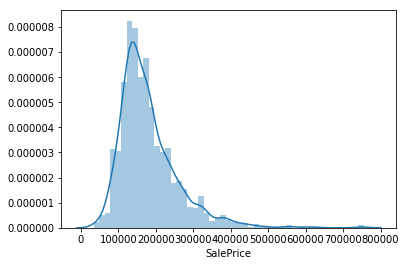

In [6]:
sns.distplot(df_train['SalePrice']);

Taking a log for this will give a better dustrubution thus eliminating the effect of outliers

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### COMBINING THE DATA TO PERFORM DATA CLEANING

In [8]:
combined_data = pd.concat([df_train, df_test], keys=['df_train', 'df_test'], sort=False)
combined_data.shape

(2919, 81)

In [9]:
combined_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        2919.000000  2919.000000    2919.000000  2919.000000   
mean       ...          93.709832    47.486811      23.098321     2.602261   
std        ...         126.526589    67.575493      64.244246    25.188169   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    26.000000       0.000000     0.000000   
75%        ...         168.000000    70.000000       0.000000     0.000000   
max        ...        1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000   
mean     16.062350     2.251799     50.825968     6.213087  2007.792737   
std      56.184365    35.663946    567.402211     2.714762     1.314964   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     4.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [10]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (df_train, 0) to (df_test, 1458)
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Ext

#### COMBINING THE TRAINING AND TESTING SET IN ORDER TO PERFORM DATA CLEANING ON IT

In [11]:
combined_data.drop('Id', axis = 1, inplace=True)

In [12]:
combined_data.shape

(2919, 80)

#### CHECKING FOR MISSING VALUES

In [13]:
missing = combined_data.isnull().sum()/len(combined_data)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
TotalBsmtSF     0.000343
SaleType        0.000343
KitchenQual     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

'PoolQC', 'MiscFeature', 'Alley', 'Fence' columns have more than 50% of the rows with missing values, hence they are being dropped from the combined data.

In [14]:
combined_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

#### DEALING WITH MISSING VALUES DEPENDING ON THE TYPE OF DATA

In [15]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combined_data[col] = combined_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combined_data[col] = combined_data[col].fillna('None')

combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)

combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])

combined_data = combined_data.drop(['Utilities'], axis=1)

combined_data["Functional"] = combined_data["Functional"].fillna("Typ")

combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])

combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])

combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])

combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])

combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna("None")

combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

combined_data['MSSubClass'] = combined_data['MSSubClass'].fillna("None")

combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#### TAKING LOG OF THE TARGET VARIABLE IN ORDER TO GET A BETTER DISTRIBUTION

In [16]:
combined_data['SalePrice'] = np.log1p(combined_data["SalePrice"])

#### PLOTTING THE HEATMAP IN ORDER TO CHECK THE CORRELATION OF ALL THE INDEPENDENT VARIABLES WITH THE DEPENDENT VARIABLES

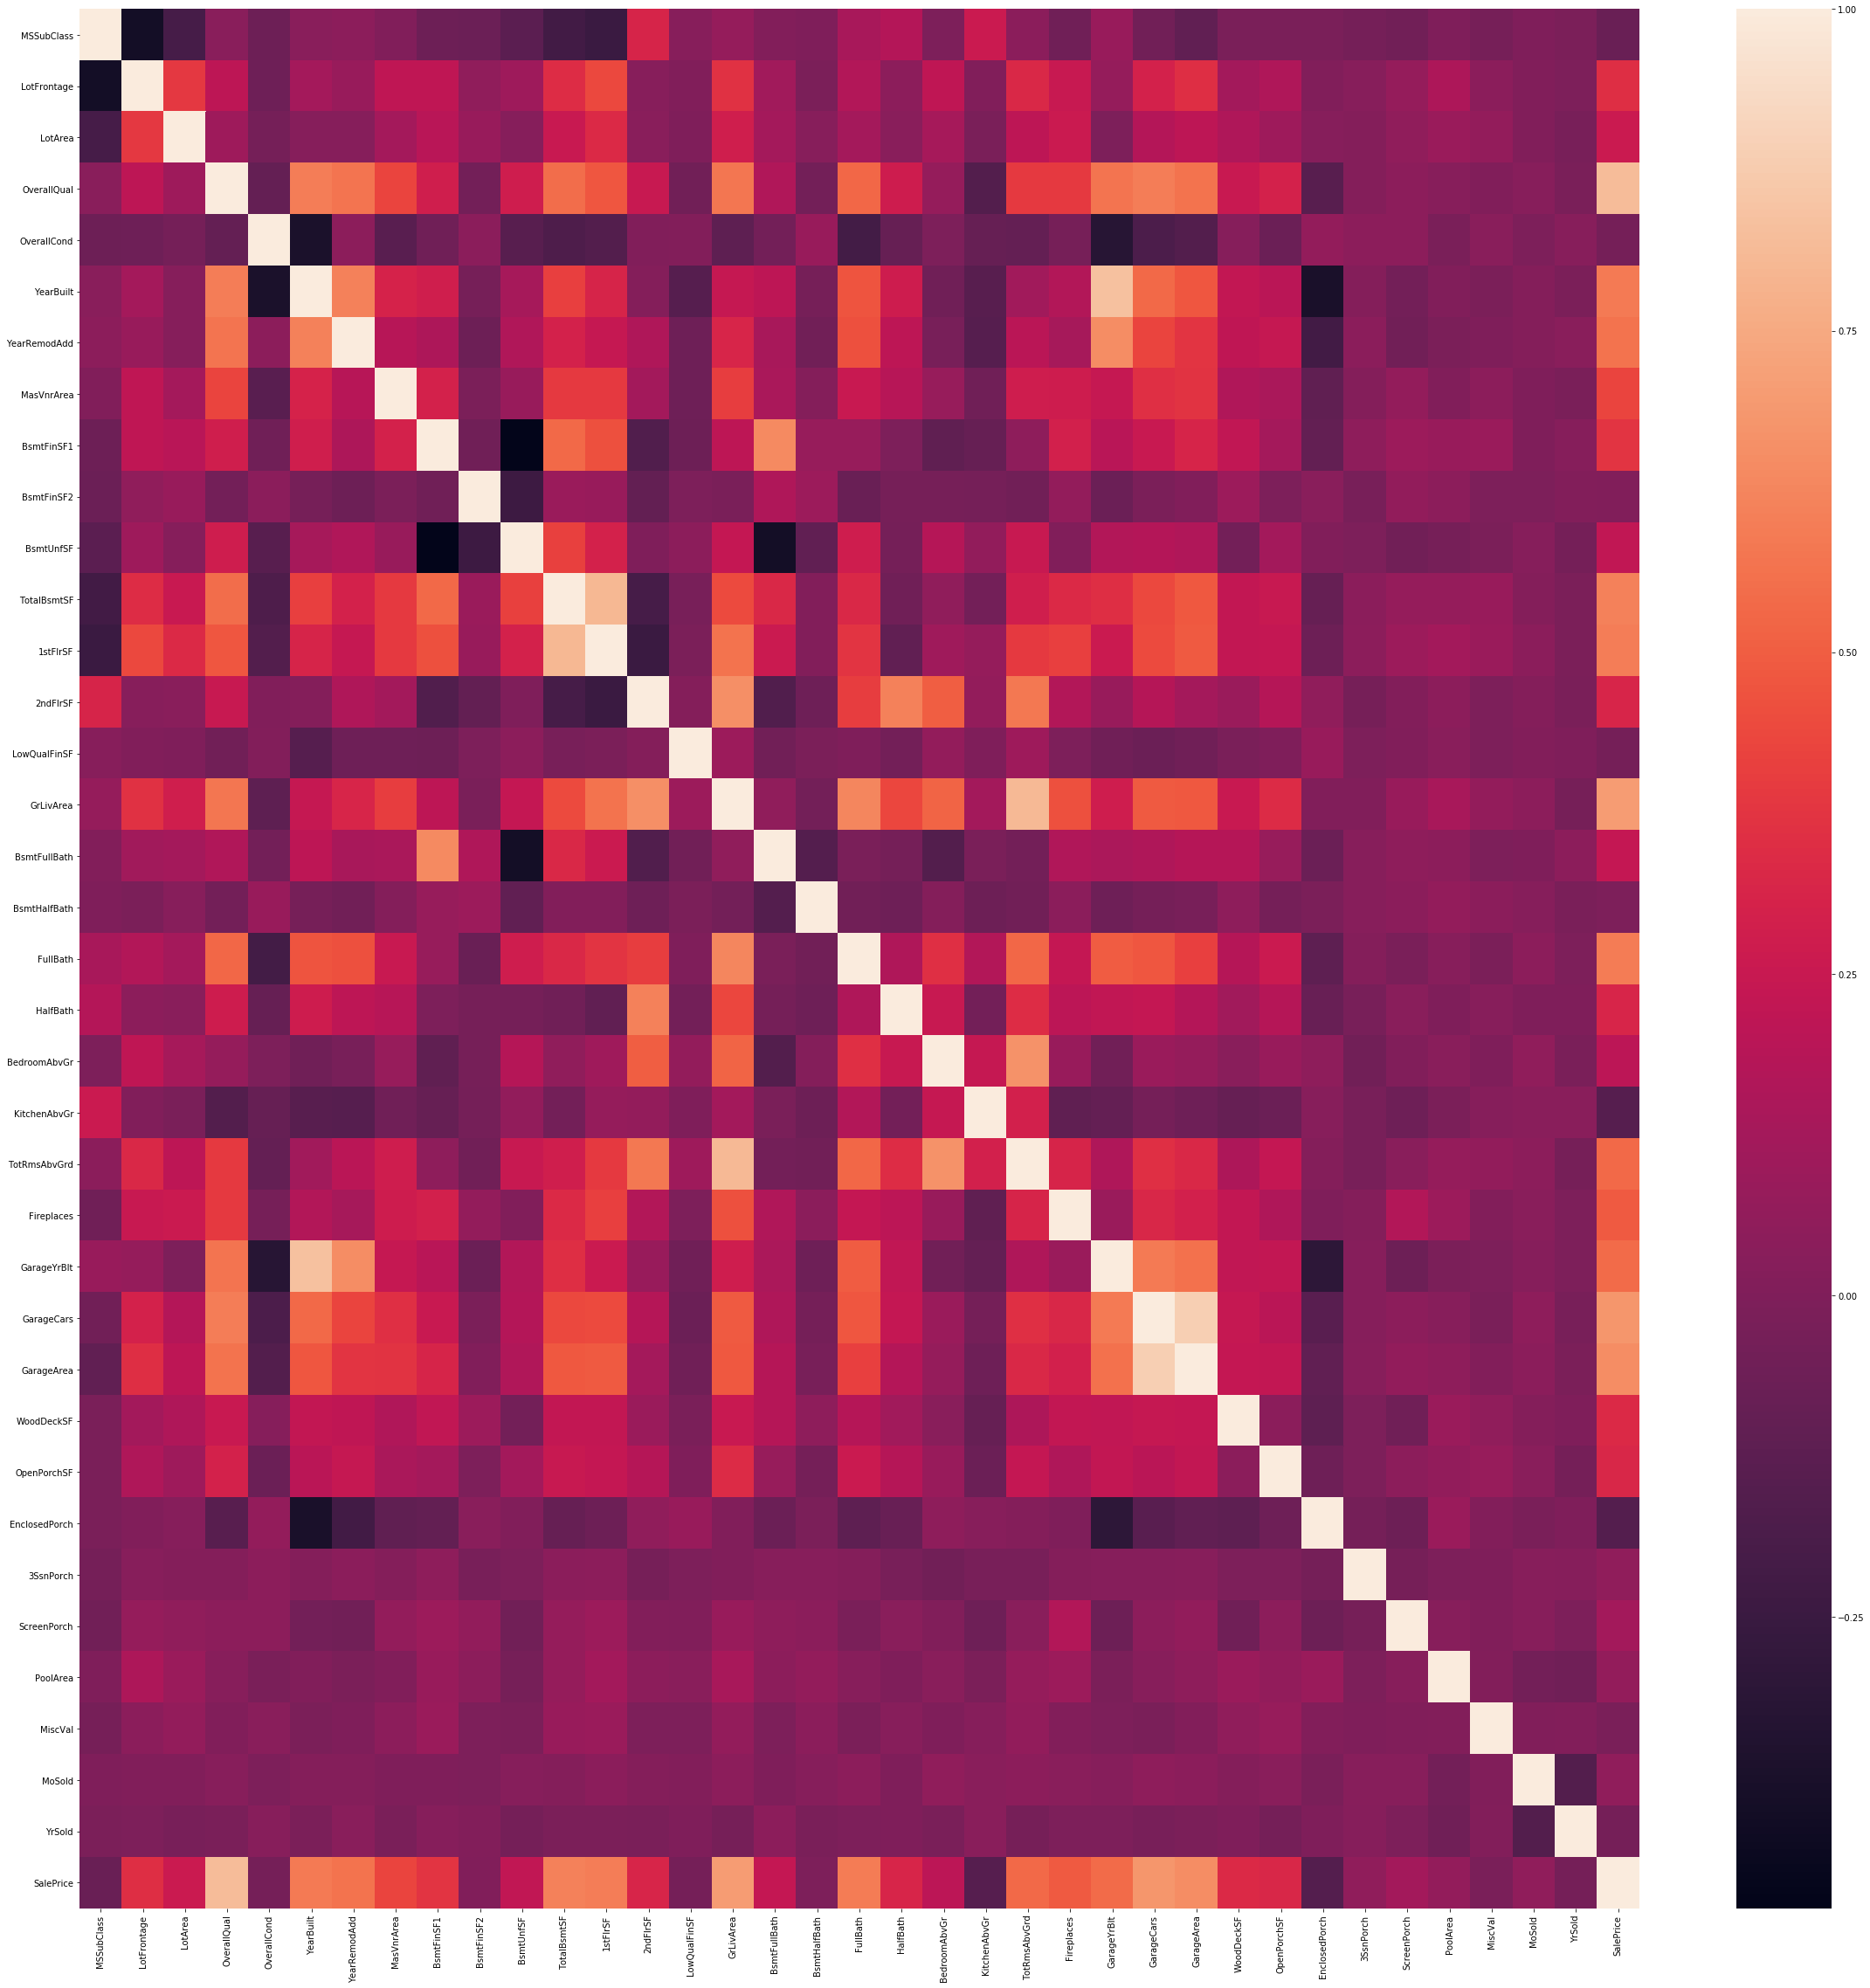

In [17]:
corr = combined_data.corr()
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr)

#### Correlation Matrix Heatmap Inference: 

SalePrice has high correlation with OverallQual, GrLivArea, GarageCars, GarageArea.

In order to get a better view of the heatmap, we are overviewing the above heatmap and extracting the variables with the a good correlation with the target variable that is the SalePrice judging from the color of the correlation matrix

OverAll Qualification, Year Built, Total RMS Above Ground, Total Basement SF, 1st FlR SF, Grn Livi Area, Full Bath, Garage Cars, Garage Areas have a good positive correlation with SalePrice.

#### DROPPING THE COLUMNS WITH LEAST CORRELATION

In [18]:
combined_data.drop(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', '2ndFlrSF', 'BsmtFullBath',
                  'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)

#### PLOTTING HEATMAP FOR SOME VARIBALES TO GET A BETTER OVERVIEW OF THE CORRELATION

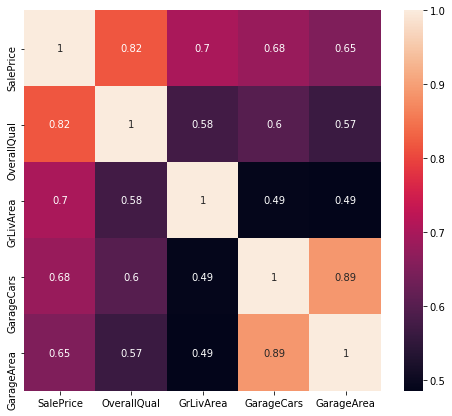

In [19]:
corr1 = combined_data[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']].corr()
f, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr1, annot=True)

#### CHECKING THE SHAPE OF THE DATA

In [20]:
combined_data.shape

(2919, 55)

#### PUTTING TARGET VARIABLE IN LABELS

In [21]:
labels = df_train['SalePrice']

#### REPLACING THE NANS WITH THE CORRECT DATA

In [22]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combined_data[col] = combined_data[col].fillna('None')
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combined_data[col] = combined_data[col].fillna(0)

#### CHECKING IF MISSING VALUES EXIST IN THE COMBINED_DATA

In [23]:
missing = combined_data.isnull().sum()/len(combined_data)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

SalePrice    0.499829
dtype: float64

#### CREATING DUMMY VARIABLES FOR THE CATEGORICAL DATA

In [24]:
combined_data2 = pd.get_dummies(combined_data, drop_first=True)

In [25]:
combined_data2.shape

(2919, 226)

In [26]:
combined_data2.head(5)

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  \
df_train 0         65.0     8450            7       2003          2003   
         1         80.0     9600            6       1976          1976   
         2         68.0    11250            7       2001          2002   
         3         60.0     9550            7       1915          1970   
         4         84.0    14260            8       2000          2000   

            MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  \
df_train 0       196.0       706.0        856.0       856       1710   
         1         0.0       978.0       1262.0      1262       1262   
         2       162.0       486.0        920.0       920       1786   
         3         0.0       216.0        756.0       961       1717   
         4       350.0       655.0       1145.0      1145       2198   

                    ...            SaleType_ConLI  SaleType_ConLw  \
df_train 0          ...                         0               0   
         1          ...                         0               0   
         2          ...                         0               0   
         3          ...                         0               0   
         4          ...                         0               0   

            SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
df_train 0             0             0            1                      0   
         1             0             0            1                      0   
         2             0             0            1                      0   
         3             0             0            1                      0   
         4             0             0            1                      0   

            SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
df_train 0                     0                     0                     1   
         1                     0                     0                     1   
         2                     0                     0                     1   
         3                     0                     0                     0   
         4                     0                     0                     1   

            SaleCondition_Partial  
df_train 0                      0  
         1                      0  
         2                      0  
         3                      0  
         4                      0  

[5 rows x 226 columns]

#### SPLITTING THE COMBINED DATA INTO TEST AND TRAIN 

In [27]:
train = combined_data2.loc['df_train']

In [28]:
test = combined_data2.loc['df_test']

#### DROPPING THE TARGET VARIBALE FROM THE TEST SET SINCE IT CONTAINS ONLY NANs

In [29]:
test.drop('SalePrice', axis=1, inplace=True)

#### CHECKING IF MISSING VALUES EXIST IN TRAINING AND TESTING SET

In [30]:
missing = train.isnull().sum()/len(train)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

Series([], dtype: float64)

In [31]:
missing = test.isnull().sum()/len(test)
missing = missing[missing >0]
missing.sort_values(ascending=False, inplace=True)
missing

Series([], dtype: float64)

In [32]:
train.shape

(1460, 226)

In [33]:
test.shape

(1459, 225)

###### JUST DISPLAYING THE COLUMN NAME IN ORDER TO GET THE HEADER VALUES WHEN CONVERTING THE CLEANED DATA INTO CSV FILE

In [34]:
train.columns.values

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', '

In [35]:
test.columns.values

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_

In [36]:
header_train = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_Gd',
       'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_None',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
       'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

In [37]:
header_test = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_Gd',
       'BsmtCond_None', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_None',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_None', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
       'BsmtFinType2_None', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_None',
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageType_None', 'GarageFinish_None',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_None', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']

#### CONVERTING THE TRAINING AND TESTING DATA INTO CSV FILES AFTER CONVERTING THEM INTO DATAFRAMES

In [38]:
training = pd.DataFrame(train)
testing = pd.DataFrame(test)
training.to_csv('training data.csv', columns = header_train, index=False)
testing.to_csv('testing data.csv', columns = header_test, index=False)

## H2O AUTOML

#### IMPORTING FILES FOR H2O

In [39]:
training = h2o.import_file("training data.csv")
testing = h2o.import_file("testing data.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
def alphabet(n):  ## for generating some arbitrary run id
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

# storing in meta_data dictionary  
def set_meta_data(analysis,run_id,server,data,model_path,run_time,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  # m_data['target']=target
  #m_data['classification']=classification
  m_data['project'] =name
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['start_time_sec'] = time.time()
  #m_data['min_mem_size'] = min_mem_size
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold 
  m_data['max_models']=model
  m_data['scale']=scale  
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  
  m_data['analysis'] = analysis
  m_data['end_time_sec'] = time.time()  
  return m_data

#### ASSIGNING DATA PARAMETERS, STOPPING PARAMETERS, SOME OPTIONAL PARAMETERS, AND MISCELLANEOUS OPTIONAL PARAMATERS FOR PERFORMING H2O ON THE MODEL

In [41]:
target='SalePrice' 
data_file='training'
run_id=alphabet(9) #Just some arbitrary ID generated
server_path=None
classification=True
scale=False
max_models=None
balance_y=False # balance_classes=balance_y
balance_threshold=0.2
project ="automl_test"  # project_name = project
analysis=0
data_path=None
model_path=None
run_time = 500
name=None 
nthreads=1                       
analysis=0
min_mem_size=6
run_dir =None

#### SIMULTANEOUSLY CREATING METADATA

In [42]:
# meta data
meta_data =set_meta_data(analysis, run_id,server_path,data_path,model_path,run_time,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'project': None, 'run_time': 500, 'run_id': 'QxwAcAIgn', 'start_time_sec': 1556296411.9237509, 'balance': False, 'balance_threshold': 0.2, 'max_models': None, 'scale': False, 'model_path': None, 'server_path': None, 'data_path': None, 'run_path': None, 'nthreads': 1, 'analysis': 0, 'end_time_sec': 1556296411.923753}


In [43]:
# assign target and independent variables
y = target
X = [name for name in training.columns if name != y]
print(y)
print(X)

SalePrice
['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neig

#### PUTTING ALL THE INDEPENDET VARIABLES IN THE META DATA

In [44]:
meta_data['variables']=X

In [45]:
model_start_time = time.time()

#### RUNNING H2O AUTOML FOR 500 SECS MAXIMUM RUNTIME

In [46]:
aml_500 = H2OAutoML(max_runtime_secs=500,project_name = project) # init automl, run for 500 seconds
aml_500.train(x=X,  
           y=y,
           training_frame=training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [47]:
## Checking for the total execution time
execution_time =  time.time() - model_start_time
meta_data['model_execution_time_sec'] = execution_time
print("Execution time for ", run_time,"sec =  ",meta_data['model_execution_time_sec'])

Execution time for  500 sec =   504.34178400039673


#### LEADERBOARD FOR 500 SECS

In [48]:
leaderboard = aml_500.leaderboard
leaderboard.head(100)

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 StackedEnsemble_BestOfFamily_AutoML_20190426_123333 0.0181729 0.134807 0.0181729 0.0883685 0.0104225 
 XGBoost_2_AutoML_20190426_123333 0.018226 0.135004 0.018226 0.0913918 0.0104575 
 StackedEnsemble_AllModels_AutoML_20190426_123333 0.0184221 0.135728 0.0184221 0.0883789 0.0104953 
 XGBoost_1_AutoML_20190426_123333 0.0186859 0.136696 0.0186859 0.0915136 0.0105697 
 GBM_grid_1_AutoML_20190426_123333_model_1 0.0190148 0.137894 0.0190148 0.0914107 0.0106873 
 XGBoost_grid_1_AutoML_20190426_123333_model_15 0.0191167 0.138263 0.0191167 0.0903497 0.0106968 
 XGBoost_grid_1_AutoML_20190426_123333_model_5 0.0192604 0.138782 0.0192604 0.0929416 0.0107404 
 GBM_grid_1_AutoML_20190426_123333_model_6 0.0192706 0.138819 0.0192706 0.0924852 0.0107284 
 GBM_1_AutoML_20190426_123333 0.0193195 0.138995 0.0193195 0.0923468 0.0107906 
 GBM_4_AutoML_20190426_123333 0.0195655 0.139877 0.0195655 0.0929595 0.0108231 
 XGBoost_3_AutoML_20190426_123333 0.019567 0.139882 0.019567 0.0945493 0.0108184 
 GBM_2_AutoML_20190426_123333 0.0195866 0.139952 0.0195866 0.0935283 0.0108196 
 GBM_3_AutoML_20190426_123333 0.0197954 0.140696 0.0197954 0.0933213 0.0108946 
 XGBoost_grid_1_AutoML_20190426_123333_model_11 0.0203244 0.142564 0.0203244 0.0967186 0.0110533 
 GBM_grid_1_AutoML_20190426_123333_model_7 0.0203971 0.142819 0.0203971 0.0966837 0.0110666 
 XGBoost_grid_1_AutoML_20190426_123333_model_8 0.0205447 0.143334 0.0205447 0.0987577 0.0110805 
 XGBoost_grid_1_AutoML_20190426_123333_model_13 0.0210055 0.144933 0.0210055 0.096097 0.0112164 
 XGBoost_grid_1_AutoML_20190426_123333_model_14 0.0210873 0.145215 0.0210873 0.0983202 0.0112508 
 DRF_1_AutoML_20190426_123333 0.0216564 0.147161 0.0216564 0.0968571 0.0114179 
 XGBoost_grid_1_AutoML_20190426_123333_model_12 0.022154 0.148842 0.022154 0.101252 0.0115177 
 XRT_1_AutoML_20190426_123333 0.0225879 0.150293 0.0225879 0.0983101 0.0116339 
 XGBoost_grid_1_AutoML_20190426_123333_model_9 0.0226593 0.15053 0.0226593 0.10265 0.0116718 
 GBM_grid_1_AutoML_20190426_123333_model_4 0.0229151 0.151377 0.0229151 0.103743 0.0117431 
 GBM_5_AutoML_20190426_123333 0.0233275 0.152733 0.0233275 0.104218 0.011857 
 GLM_grid_1_AutoML_20190426_123333_model_1 0.0233696 0.152871 0.0233696 0.0983193 0.0117094 
 XGBoost_grid_1_AutoML_20190426_123333_model_17 0.0247297 0.157257 0.0247297 0.117914 0.0121139 
 GBM_grid_1_AutoML_20190426_123333_model_8 0.0266431 0.163227 0.0266431 0.113625 0.0126059 
 DeepLearning_grid_1_AutoML_20190426_123333_model_4 0.0303151 0.174112 0.0303151 0.117141 0.0134635 
 DeepLearning_grid_1_AutoML_20190426_123333_model_7 0.0305742 0.174855 0.0305742 0.119268 0.0134255 
 DeepLearning_grid_1_AutoML_20190426_123333_model_5 0.0317616 0.178218 0.0317616 0.124405 0.0137916 
 DeepLearning_1_AutoML_20190426_123333 0.0317716 0.178246 0.0317716 0.120611 0.013846 
 GBM_grid_1_AutoML_20190426_123333_model_10 0.0379341 0.194767 0.0379341 0.135969 0.0150526 
 DeepLearning_grid_1_AutoML_20190426_123333_model_2 0.0400709 0.200177 0.0400709 0.119724 0.015166 
 DeepLearning_grid_1_AutoML_20190426_123333_model_3 0.0406734 0.201676 0.0406734 0.126817 0.0156109 
 DeepLearning_grid_1_AutoML_20190426_123333_model_6 0.0418538 0.204582 0.0418538 0.146211 0.0158339 
 DeepLearning_grid_1_AutoML_20190426_123333_model_1 0.0636172 0.252225 0.0636172 0.145105 0.0193295 
 XGBoost_grid_1_AutoML_20190426_123333_model_1 0.0720624 0.268444 0.0720624 0.202893 0.0207829 
 GBM_grid_1_AutoML_20190426_123333_model_9 0.093722 0.30614 0.093722 0.228959 0.0235331 
 XGBoost_grid_1_AutoML_20190426_123333_model_6 0.120199 0.346697 0.120199 0.261831 0.0264273 
 GBM_grid_1_AutoML_20190426_123333_model_2 0.151876 0.389712 0.151876 0.301719 0.0299181 
 GBM_grid_1_AutoML_20190426_123333_model_3 0.151998 0.389869 0.151998 0.301842 0.02993 
 GBM_grid_1_AutoML_20190426_123333_model_5 0.152518 0.390536 0.152518 0.302223 0.0299812 
 GBM_grid_1_AutoML_20190426_123333_model_11 0.154374 0.392905 0.154374 0.30

In [49]:
length = len(leaderboard)- 1
length
meta_data["Models_generated"] = length
length

49

In [50]:
# save leaderboard to csv

aml_500_leaderboard_df=aml_500.leaderboard.as_data_frame()
leaderboard_stats=run_id+'_500_leaderboard.csv'
aml_500_leaderboard_df.to_csv(leaderboard_stats)

#### IMPORTING THE LEADERBOARD AS A LIST

In [51]:
list_500 = leaderboard.as_data_frame(use_pandas=True).as_matrix()[:,0].tolist()

#### GETTING THE TOP MODEL FROM THE LEADERBOARD

In [52]:
aml_500leaderboard_df=aml_500.leaderboard.as_data_frame()
model_set=aml_500leaderboard_df['model_id']     #creating an empty dataframe with a model_id column
mod_best500=h2o.get_model(model_set[0])         #gets the top model
mod_best500.algo
mod_best500

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_AutoML_20190426_123333
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005862581158280327
RMSE: 0.07656749413609099
MAE: 0.049350754424563714
RMSLE: 0.0059506599582196465
R^2: 0.9632325802982219
Mean Residual Deviance: 0.005862581158280327
Null degrees of freedom: 1459
Residual degrees of freedom: 1455
Null deviance: 232.79763879334942
Residual deviance: 8.559368491089277
AIC: -3347.880823488812

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.018172926922068445
RMSE: 0.13480699878740882
MAE: 0.08836850919616605
RMSLE: 0.010422526187853245
R^2: 0.8860277387530934
Mean Residual Deviance: 0.018172926922068445
Null degrees of freedom: 1459
Residual degrees of freedom: 1454
Null deviance: 233.20094960349655
Residual deviance: 26.532473306219927
AIC: -1694.1200762687001


We can see that the leaderboard generates Satcked Ensemble as the top model, but Stacked Ensemble does not have any hyperparameters of it's own therefore, the next best model that is XGBoost is taken as the top model for calculating the best hyperparameter

#### PARAMETERS OF XGBOOST

In [53]:
h2o.get_model(model_set[1]).params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_20190426_123333',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_20190426_123333'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_training_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_training_data.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'},
 'fol

#### PARAMETERS OF THE TOP MODEL (STACKED ENSEMBLE)

In [54]:
mod_best500.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_123333',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_123333'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_training_data.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_training_data.hex'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'SalePrice',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'blending_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,

#### FOR FILE CONVERSION

In [55]:
## Function for converting dictionary to json
def dict_to_json(dct,n,m):
  j = json.dumps(dct, indent=4)
  f = open(n, m)
  print(j, file=f)
  f.close()

## Function for converting files to csv
def writeToFile(line,n,m):
  f = open(n, m)
  print(line, file=f)
  f.close()

#### A FUNCTION FOR GENERATING HYPERPARAMETERS FOR EVERY MODEL IN THE LEADER BOARD BY PASSING THE MODEL AND AN ARRAY OF HYPERPARAMETERS ALONG WITH THE RUN TIME AND THE LIST RUNTIME

In [56]:
def generate_hyperparameters(model, keys, run_time, list_runtime):
    list = list_runtime;
    head = "Model Name,"
    for k in keys:
        head = head + k+"_default"+","+ k+"_actual"+","
    head = head[:-1]
    n1=run_id+'_hy_parameter_'+run_time+'_'+model+'.csv';
    writeToFile(head,n1,'w')

    for algo in list:
        if algo.startswith(model):
           # print(algo)
            mod = h2o.get_model(algo)
            hy_parameter_500 = mod.params
            n=run_id+'_hy_parameter_'+run_time+'_'+model+'.json';
            dict_to_json(hy_parameter_500,n,'a')
            mod.params

            rec=algo+","
            for k in keys:
                print(mod.params[k])
                rec = rec + str(mod.params[k]["default"])+","+str(mod.params[k]["actual"])+","
            rec = rec[:-1]
            #print(rec)
            writeToFile(rec,n1,'a')

#### SPECIFYING THE HYPERPARAMETERS AND THE MODEL NAMES AND PASSING THEM THROUGH THE GENERATE HYPERPARAMETERS FUNCTION

In [57]:
keys_xgboost = ["ntrees","max_depth","min_rows","min_sum_hessian_in_leaf","sample_rate","col_sample_rate",
                "col_sample_rate_per_tree","booster","reg_lambda","reg_alpha"];
keys_gbm = ["histogram_type","ntrees","max_depth","min_rows","learn_rate","sample_rate","col_sample_rate",
            "col_sample_rate_per_tree","min_split_improvement"];
keys_glm = ["alpha","missing_values_handling"];
keys_dl = ["epochs","activation","rho","epsilon","input_dropout_ratio","hidden","hidden_dropout_ratios"];
keys_drf = ["balance_classes","class_sampling_factors","max_after_balance_size","ntrees","max_depth",
            "min_rows","nbins","nbins_top_level","nbins_cats","seed","sample_rate","sample_rate_per_class",
            "col_sample_rate_per_tree","col_sample_rate_change_per_level","min_split_improvement",
            "histogram_type","mtries","categorical_encoding"]

generate_hyperparameters('XGBoost',keys_xgboost,'500', list_500);
generate_hyperparameters('GBM',keys_gbm, '500', list_500);
generate_hyperparameters('GLM',keys_glm, '500', list_500);
generate_hyperparameters('DeepLearning',keys_dl, '500', list_500);
generate_hyperparameters('Distributed Random Forest', keys_drf, '500',list_500)

{'default': 50, 'actual': 147}
{'default': 6, 'actual': 5}
{'default': 1.0, 'actual': 3.0}
{'default': 100.0, 'actual': 100.0}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 'gbtree', 'actual': 'gbtree'}
{'default': 1.0, 'actual': 1.0}
{'default': 0.0, 'actual': 0.0}
{'default': 50, 'actual': 147}
{'default': 6, 'actual': 5}
{'default': 1.0, 'actual': 3.0}
{'default': 100.0, 'actual': 100.0}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.8}
{'default': 'gbtree', 'actual': 'gbtree'}
{'default': 1.0, 'actual': 1.0}
{'default': 0.0, 'actual': 0.0}
{'default': 50, 'actual': 170}
{'default': 6, 'actual': 5}
{'default': 1.0, 'actual': 0.1}
{'default': 100.0, 'actual': 100.0}
{'default': 1.0, 'actual': 1.0}
{'default': 1.0, 'actual': 0.8}
{'default': 1.0, 'actual': 0.7}
{'default': 'gbtree', 'actual': 'gbtree'}
{'default': 1.0, 'actual': 0.01}
{'default': 0.0, 'actual': 0.1}
{'default': 

The hyperparameters taken above are the H2O specified Hyperparameters. 

H2OAutoML Documentation also states that DRF includes both Random Forest and Extremely Randomized Tree algorithms. 

#### IMPORTANT HYPERPARAMETERS - EVALUATION

Here, the hyperparameters are evaluated by cross validation. I have iterated over different hyperparameters by varying the rest. By taking the mean of all the hyperparameter value columns and giving one of the hyperparameters a default value, we have checked the root mean squared error. 

Depending on the amount of variations in the Root mean squared value we can tell, how giving a hyperparameter a pre-defined value will change it's evaluation metric.

More the change, we can say more important the hyperparameter is because, tuning the model with that hyperparameter will become necessary as it won't give 

In [59]:
xgboost_500 = pd.read_csv("QxwAcAIgn_hy_parameter_500_XGBoost.csv")
train_df = pd.read_csv("training data.csv")

In [60]:
xgboost_500.shape

(21, 21)

In [61]:
xgboost_500=xgboost_500.sample(n=5)

In [62]:
xgb_model = xgboost_500['Model Name']
xgb_model = pd.DataFrame(xgb_model)
xgb_model

Model Name
11  XGBoost_grid_1_AutoML_20190426_123333_model_17
17   XGBoost_grid_1_AutoML_20190426_123333_model_2
16  XGBoost_grid_1_AutoML_20190426_123333_model_16
12   XGBoost_grid_1_AutoML_20190426_123333_model_1
5   XGBoost_grid_1_AutoML_20190426_123333_model_11

In [63]:
xgboost_500.columns.values

array(['Model Name', 'ntrees_default', 'ntrees_actual',
       'max_depth_default', 'max_depth_actual', 'min_rows_default',
       'min_rows_actual', 'min_sum_hessian_in_leaf_default',
       'min_sum_hessian_in_leaf_actual', 'sample_rate_default',
       'sample_rate_actual', 'col_sample_rate_default',
       'col_sample_rate_actual', 'col_sample_rate_per_tree_default',
       'col_sample_rate_per_tree_actual', 'booster_default',
       'booster_actual', 'reg_lambda_default', 'reg_lambda_actual',
       'reg_alpha_default', 'reg_alpha_actual'], dtype=object)

In [64]:
features = xgboost_500[['ntrees_default', 'ntrees_actual',
       'max_depth_default', 'max_depth_actual','col_sample_rate_default',
       'col_sample_rate_actual', 'col_sample_rate_per_tree_default',
       'col_sample_rate_per_tree_actual', 'booster_default',
       'booster_actual', 'reg_lambda_default', 'reg_lambda_actual',
       'reg_alpha_default', 'reg_alpha_actual']]
features

ntrees_default  ntrees_actual  max_depth_default  max_depth_actual  \
11              50            113                  6                15   
17              50            109                  6                20   
16              50             62                  6                15   
12              50             97                  6                20   
5               50            220                  6                10   

    col_sample_rate_default  col_sample_rate_actual  \
11                      1.0                     1.0   
17                      1.0                     0.8   
16                      1.0                     0.8   
12                      1.0                     1.0   
5                       1.0                     1.0   

    col_sample_rate_per_tree_default  col_sample_rate_per_tree_actual  \
11                               1.0                              0.8   
17                               1.0                              0.9   
16                               1.0                              0.9   
12                               1.0                              0.7   
5                                1.0                              1.0   

   booster_default booster_actual  reg_lambda_default  reg_lambda_actual  \
11          gbtree         gbtree                 1.0              0.010   
17          gbtree           dart                 1.0            100.000   
16          gbtree           dart                 1.0              0.001   
12          gbtree           dart                 1.0              1.000   
5           gbtree         gbtree                 1.0             10.000   

    reg_alpha_default  reg_alpha_actual  
11                0.0             0.500  
17                0.0             0.001  
16                0.0             0.100  
12                0.0             0.001  
5                 0.0             1.000

In [65]:
features = features.rename(index=str, columns={"ntrees_default": "n_estimators", "ntrees_actual": "n_estimators",
                                     "max_depth_default": "max_depth", "max_depth_actual": "max_depth",
                                     "col_sample_rate_per_tree_default": "colsample_bytree", "col_sample_rate_per_tree_actual": "colsample_bytree",
                                     "booster_default" : "booster", "booster_actual" : "booster",
                                     "reg_lambda_default" : "reg_lambda" ,"reg_lambda_actual" : "reg_lambda",
                                     "reg_alpha_default" : "reg_alpha", "reg_alpha_actual" : "reg_alpha"
                                    })
features

n_estimators  n_estimators  max_depth  max_depth  col_sample_rate_default  \
11            50           113          6         15                      1.0   
17            50           109          6         20                      1.0   
16            50            62          6         15                      1.0   
12            50            97          6         20                      1.0   
5             50           220          6         10                      1.0   

    col_sample_rate_actual  colsample_bytree  colsample_bytree booster  \
11                     1.0               1.0               0.8  gbtree   
17                     0.8               1.0               0.9  gbtree   
16                     0.8               1.0               0.9  gbtree   
12                     1.0               1.0               0.7  gbtree   
5                      1.0               1.0               1.0  gbtree   

   booster  reg_lambda  reg_lambda  reg_alpha  reg_alpha  
11  gbtree         1.0       0.010        0.0      0.500  
17    dart         1.0     100.000        0.0      0.001  
16    dart         1.0       0.001        0.0      0.100  
12    dart         1.0       1.000        0.0      0.001  
5   gbtree         1.0      10.000        0.0      1.000

In [66]:
import statistics
mean_values = features.mean()
mean_values=pd.DataFrame(mean_values)
mean_values

0
n_estimators              50.0000
n_estimators             120.2000
max_depth                  6.0000
max_depth                 16.0000
col_sample_rate_default    1.0000
col_sample_rate_actual     0.9200
colsample_bytree           1.0000
colsample_bytree           0.8600
reg_lambda                 1.0000
reg_lambda                22.2022
reg_alpha                  0.0000
reg_alpha                  0.3204

In [67]:
mean_values = mean_values.drop(["col_sample_rate_default","col_sample_rate_actual"], axis = 0)
mean_values

0
n_estimators       50.0000
n_estimators      120.2000
max_depth           6.0000
max_depth          16.0000
colsample_bytree    1.0000
colsample_bytree    0.8600
reg_lambda          1.0000
reg_lambda         22.2022
reg_alpha           0.0000
reg_alpha           0.3204

In [68]:
print(mean_values.size/2 + 1)

6.0


In [69]:
X1 = train_df.loc[:, train_df.columns != 'SalePrice']
y1 = np.log(train_df['SalePrice'])

In [70]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_log_error

def rmsle_scorer(pred, test):
    rmsle = np.sqrt(mean_squared_log_error(pred,test))
    return rmsle

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, test_size=0.2)

In [72]:
accuracies = []

In [73]:
size_median = mean_values.size/2 + 1
for count in range(int(size_median)):
    if count == 0 :
        n_estimators =  int(mean_values.iloc[0]) 
    else :
        n_estimators = int(mean_values.iloc[1])
    
    if count == 1 :
        max_depth =  int(mean_values.iloc[2])
    else :
        max_depth = int(mean_values.iloc[3])
    
    if count == 2 :
        colsample_bytree =  int(mean_values.iloc[4])
    else :
        colsample_bytree = int(mean_values.iloc[5])
        
    if count == 3 :
        reg_lambda =  int(mean_values.iloc[6])
    else :
        reg_lambda = int(mean_values.iloc[7])
    
    if count == 4 :
        reg_alpha =  float(mean_values.iloc[8])
    else :
        reg_alpha = float(mean_values.iloc[9])
    print(n_estimators)   
    xgb = XGBRegressor(max_depth= max_depth,n_estimators = n_estimators,
                        colsample_bytree=colsample_bytree,reg_lambda=reg_lambda, 
                        reg_alpha=reg_alpha)
    #xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    y_pred= xgb.predict(X_test)
    accuracies.append(rmsle_scorer(y_test, y_pred))

50
120
120
120
120
120


In [74]:
accuracies

[0.009606654413640234,
 0.0074472923428038195,
 0.004067095361763106,
 0.006897779580933073,
 0.007065893717232059,
 0.0074472923428038195]

## VARIABLE IMPORTANCE

In [75]:
mod_best_XGB_500=h2o.get_model(model_set[1])
vi_xgb500 = mod_best_XGB_500.varimp(use_pandas = True)
n=run_id+'_variableImportanceXGBoost500_.json'
vi_xgb500.to_csv(run_id+'_variableImportanceXGB00st500_.csv', index=False)
vi_xgb500 = vi_xgb500.to_dict('dict')
dict_to_json(vi_xgb500,n,'a')

### RANGE

In [91]:
xgboost_500 = pd.read_csv("QxwAcAIgn_hy_parameter_500_XGBoost.csv")

In [92]:
xgboost_500.head()

Model Name  ntrees_default  \
0                XGBoost_2_AutoML_20190426_123333              50   
1                XGBoost_1_AutoML_20190426_123333              50   
2  XGBoost_grid_1_AutoML_20190426_123333_model_15              50   
3   XGBoost_grid_1_AutoML_20190426_123333_model_5              50   
4                XGBoost_3_AutoML_20190426_123333              50   

   ntrees_actual  max_depth_default  max_depth_actual  min_rows_default  \
0            147                  6                 5               1.0   
1            147                  6                 5               1.0   
2            170                  6                 5               1.0   
3            201                  6                10               1.0   
4            147                  6                 5               1.0   

   min_rows_actual  min_sum_hessian_in_leaf_default  \
0              3.0                            100.0   
1              3.0                            100.0   
2              0.1                            100.0   
3              3.0                            100.0   
4              3.0                            100.0   

   min_sum_hessian_in_leaf_actual  sample_rate_default        ...         \
0                           100.0                  1.0        ...          
1                           100.0                  1.0        ...          
2                           100.0                  1.0        ...          
3                           100.0                  1.0        ...          
4                           100.0                  1.0        ...          

   col_sample_rate_default  col_sample_rate_actual  \
0                      1.0                     0.8   
1                      1.0                     0.8   
2                      1.0                     0.8   
3                      1.0                     0.8   
4                      1.0                     0.8   

   col_sample_rate_per_tree_default  col_sample_rate_per_tree_actual  \
0                               1.0                              0.8   
1                               1.0                              0.8   
2                               1.0                              0.7   
3                               1.0                              0.7   
4                               1.0                              0.8   

   booster_default booster_actual reg_lambda_default  reg_lambda_actual  \
0           gbtree         gbtree                1.0               1.00   
1           gbtree         gbtree                1.0               1.00   
2           gbtree         gbtree                1.0               0.01   
3           gbtree         gbtree                1.0              10.00   
4           gbtree         gbtree                1.0               1.00   

   reg_alpha_default  reg_alpha_actual  
0                0.0               0.0  
1                0.0               0.0  
2                0.0               0.1  
3                0.0               0.1  
4                0.0               0.0  

[5 rows x 21 columns]

In [93]:
s0=xgboost_500.iloc[:,3:].min()

In [94]:
s1=xgboost_500.iloc[:,3:].max()

In [95]:
df =pd.concat(dict(min =s0,max=s1),axis=1)
df

max     min
max_depth_default                      6       6
max_depth_actual                      20       5
min_rows_default                       1       1
min_rows_actual                       20    0.01
min_sum_hessian_in_leaf_default      100     100
min_sum_hessian_in_leaf_actual       100     100
sample_rate_default                    1       1
sample_rate_actual                     1     0.6
col_sample_rate_default                1       1
col_sample_rate_actual                 1     0.6
col_sample_rate_per_tree_default       1       1
col_sample_rate_per_tree_actual        1     0.7
booster_default                   gbtree  gbtree
booster_actual                    gbtree    dart
reg_lambda_default                     1       1
reg_lambda_actual                    100   0.001
reg_alpha_default                      0       0
reg_alpha_actual                       1       0

In [87]:
meta_data['end_time'] = time.time()

In [88]:
meta_data

{'project': None,
 'run_time': 500,
 'run_id': 'QxwAcAIgn',
 'start_time_sec': 1556296411.9237509,
 'balance': False,
 'balance_threshold': 0.2,
 'max_models': None,
 'scale': False,
 'model_path': None,
 'server_path': None,
 'data_path': None,
 'run_path': None,
 'nthreads': 1,
 'analysis': 0,
 'end_time_sec': 1556296411.923753,
 'variables': ['LotFrontage',
  'LotArea',
  'OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'TotalBsmtSF',
  '1stFlrSF',
  'GrLivArea',
  'FullBath',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'MSZoning_FV',
  'MSZoning_RH',
  'MSZoning_RL',
  'MSZoning_RM',
  'Street_Pave',
  'LotShape_IR2',
  'LotShape_IR3',
  'LotShape_Reg',
  'LandContour_HLS',
  'LandContour_Low',
  'LandContour_Lvl',
  'LotConfig_CulDSac',
  'LotConfig_FR2',
  'LotConfig_FR3',
  'LotConfig_Inside',
  'LandSlope_Mod',
  'LandSlope_Sev',
  'Neighborhood_Blueste',
  'Neighborhood_BrDale',
  'Neighborhood_BrkSide',

#### CREATING A JSON META DATA FILE

In [89]:
n=run_id+'_500_meta_data.json'
dict_to_json(meta_data,n,'a')

#### SHUTTING DOWN H2O CLUSTER

In [90]:
h2o.cluster().shutdown()

H2O session _sid_9b56 closed.


## CONCLUSION

* We have successfully created a dataset of the best hyperparameters for the House Prices: Advanced Regression Techniques Dataset.

* The important hyperparameter is n_estimator since a defaukt value of n_estimator will give an RMSLE which is way worse that the RMSLEs when the rest of the hyperparameters take default value.

* The ranges of these hyperparameters are calculated. We can say from looking at the ranges that if someone is given these ranges to do GridSearchCV, more the range of a hyperparameter, more will the computational time for running the model.

### CONTRIBUTIONS


Personal Contribution : 50%

External Source : 50%

### CITATIONS


1. Article title:	House Prices: Advanced Regression Techniques | Kaggle

   Website title:	Kaggle.com
   
   URL:	https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
   
   
2. Article title:	prabhuSub/Hyperparamter-Samples

   Website title:	GitHub
   
   URL:	https://github.com/prabhuSub/Hyperparamter-Samples
   
   
3. Article title:	nikbearbrown/CSYE_7245

   Website title:	GitHub
   
   URL:	https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O
   
   
4. Article title:	nikbearbrown/CSYE_7245

   Website title:	GitHub
   
   URL:	https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O

## LICENSE

Copyright 2019 APURVA SALVI, HARISH KADWE, AESHA SHAH

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.